In [1]:
import os
import numpy as np

from PIL import Image 

from skimage.feature import hog
from skimage import color

dataset_path = '../images'

data = []
labels = []

image_size = (64, 64)

folder_labels = {
    'Sample001': 0,
    'Sample002': 1,
    'Sample003': 2,
    'Sample004': 3,
    'Sample005': 4,
    'Sample006': 5,
    'Sample007': 6,
    'Sample008': 7,
    'Sample009': 8,
    'Sample010': 9,
}






In [2]:

for folder_name, label in folder_labels.items():
    folder_path = os.path.join(dataset_path, folder_name)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):  
            image_path = os.path.join(folder_path, file_name)
            image = Image.open(image_path).convert('L')  
            image = image.resize(image_size)  
            image_array = np.array(image)
            image_reshaped = image_array.reshape(image_size)  
            feature_vector, _ = hog(image_reshaped, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            data.append(feature_vector)
            labels.append(label)

X = np.array(data)
y = np.array(labels)
print(f"Shape of features: {X.shape}")

Shape of features: (593, 1764)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifierLR = LogisticRegression( max_iter=1000,random_state=42 ,)

classifierLR.fit(X_train, y_train)

y_pred_LR = classifierLR.predict(X_test)

acc_LR = accuracy_score(y_test, y_pred_LR)

print(f'Accuracy: {acc_LR * 100:.2f}%')





Accuracy: 93.28%


In [5]:
from sklearn.metrics import mean_squared_error

y_pred_prob_LR = classifierLR.predict_proba(X_test)

mse_LR = mean_squared_error(y_test, y_pred_LR)

print(f'Mean Squared Error (MSE): {mse_LR:.4f}')


Mean Squared Error (MSE): 1.4118


In [6]:
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR})
comparison_df.head(20)

,Actual,Predicted
0,0,0
1,0,0
2,2,2
3,6,6
4,2,2
5,5,5
6,3,3
7,8,8
8,0,0
9,1,1


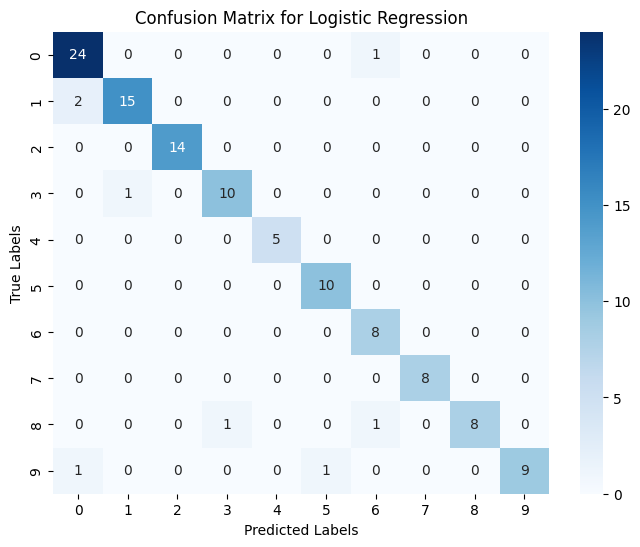

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [8]:
import plotly.express as px

cm_LR = confusion_matrix(y_test, y_pred_LR)

classes = list(set(y_test))

fig = px.imshow(cm_LR,
                labels=dict(x="Predicted", y="Actual", color="Count"),
                x=[f'Predicted {label}' for label in classes],
                y=[f'Actual {label}' for label in classes],
                title="Confusion Matrix LR",
                color_continuous_scale="Blues")
fig.update_xaxes(side="top")
fig.show()


In [9]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
print(f'Precision: {precision_LR:.2f}')

recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
print(f'Recall: {recall_LR:.2f}')

Precision: 0.94
Recall: 0.93


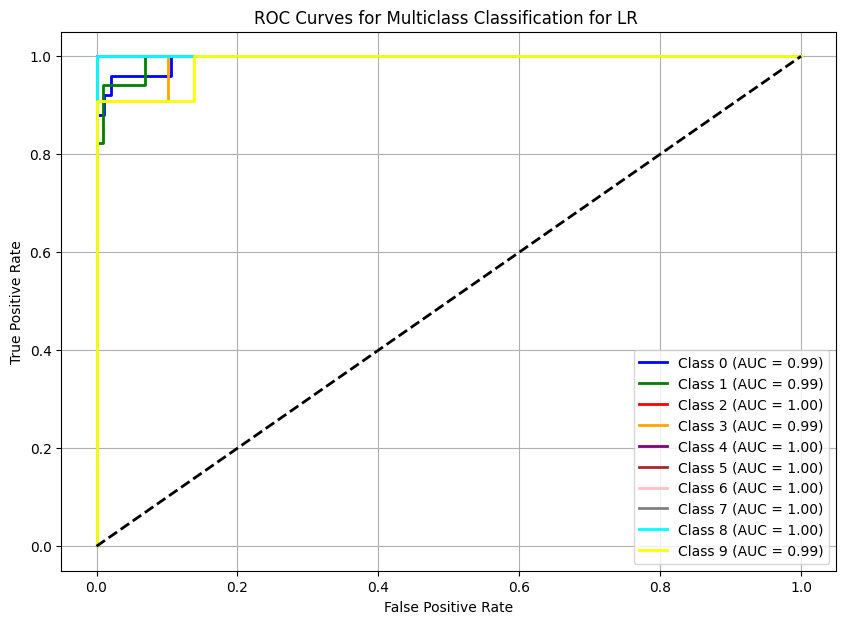

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
n_classes = y_test_bin.shape[1]
fpr = {}  
tpr = {}  
roc_auc = {}  

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_LR[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellow']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification for LR ')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [11]:
from sklearn.neighbors import KNeighborsClassifier

classifierKnn = KNeighborsClassifier(n_neighbors=5)

classifierKnn.fit(X_train, y_train)

y_pred_Knn = classifierKnn.predict(X_test)

acc_Knn = accuracy_score(y_test, y_pred_Knn)
print(f'Accuracy: {acc_Knn * 100:.2f}%')

Accuracy: 89.08%


In [12]:
y_pred_prob_Knn = classifierKnn.predict_proba(X_test)
mse_Knn = mean_squared_error(y_test, y_pred_Knn )
print(f'Mean Squared Error (MSE): {mse_Knn:.4f}')


Mean Squared Error (MSE): 3.2857


In [13]:

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_Knn})
comparison_df.head(20)

,Actual,Predicted
0,0,0
1,0,0
2,2,2
3,6,6
4,2,2
5,5,5
6,3,3
7,8,6
8,0,0
9,1,1


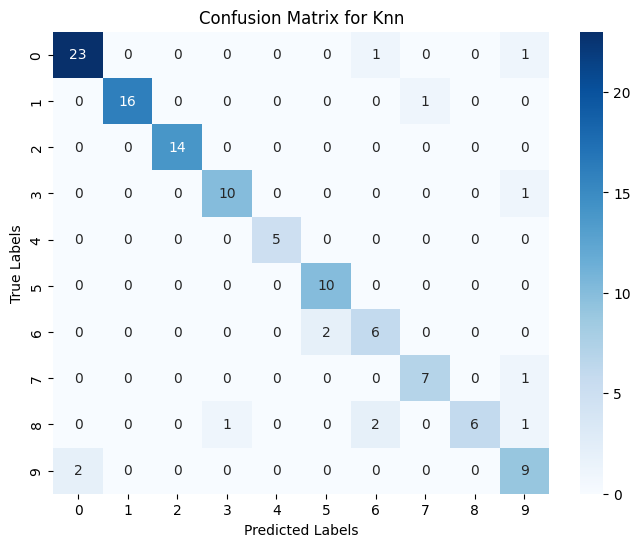

In [14]:

cm_Knn = confusion_matrix(y_test, y_pred_Knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Knn, annot=True, fmt='d', cmap='Blues', xticklabels=list(set(y_test)), yticklabels=list(set(y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Knn')
plt.show()

In [15]:

classes = list(set(y_test))

fig = px.imshow(cm_Knn,
                labels=dict(x="Predicted", y="Actual", color="Count"),
                x=[f'Predicted {label}' for label in classes],
                y=[f'Actual {label}' for label in classes],
                title="Confusion Matrix knn",
                color_continuous_scale="Blues")
fig.update_xaxes(side="top")
fig.show()

In [16]:
precision_Knn = precision_score(y_test, y_pred_Knn, average='weighted')
print(f'Precision: {precision_Knn:.2f}')

recall_Knn = recall_score(y_test, y_pred_Knn, average='weighted')
print(f'Recall: {recall_Knn:.2f}')

Precision: 0.90
Recall: 0.89


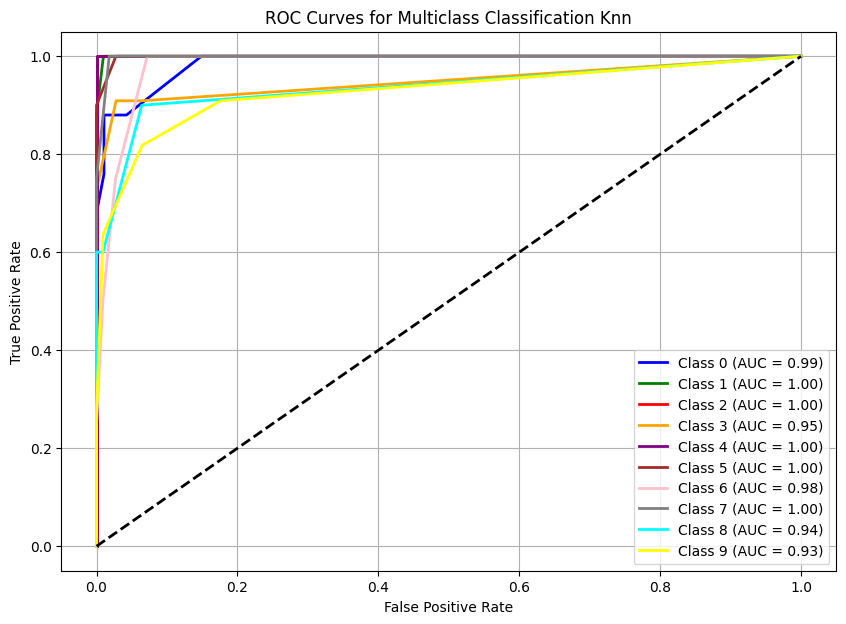

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))
n_classes = y_test_bin.shape[1]
fpr = {}  
tpr = {}  
roc_auc = {}  

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_Knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellow']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification Knn')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

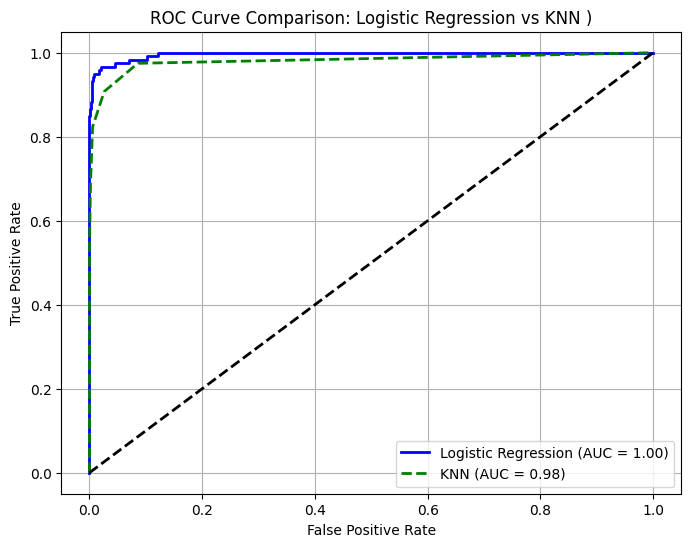

In [18]:

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  
n_classes = y_test_bin.shape[1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_LR.ravel())  
roc_auc_lr = roc_auc_score(y_test_bin, y_pred_prob_LR, average="macro", multi_class="ovr")

fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_Knn.ravel()) 
roc_auc_knn = roc_auc_score(y_test_bin, y_pred_prob_Knn, average="macro", multi_class="ovr")

plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, linestyle='--', label=f'KNN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression vs KNN )')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


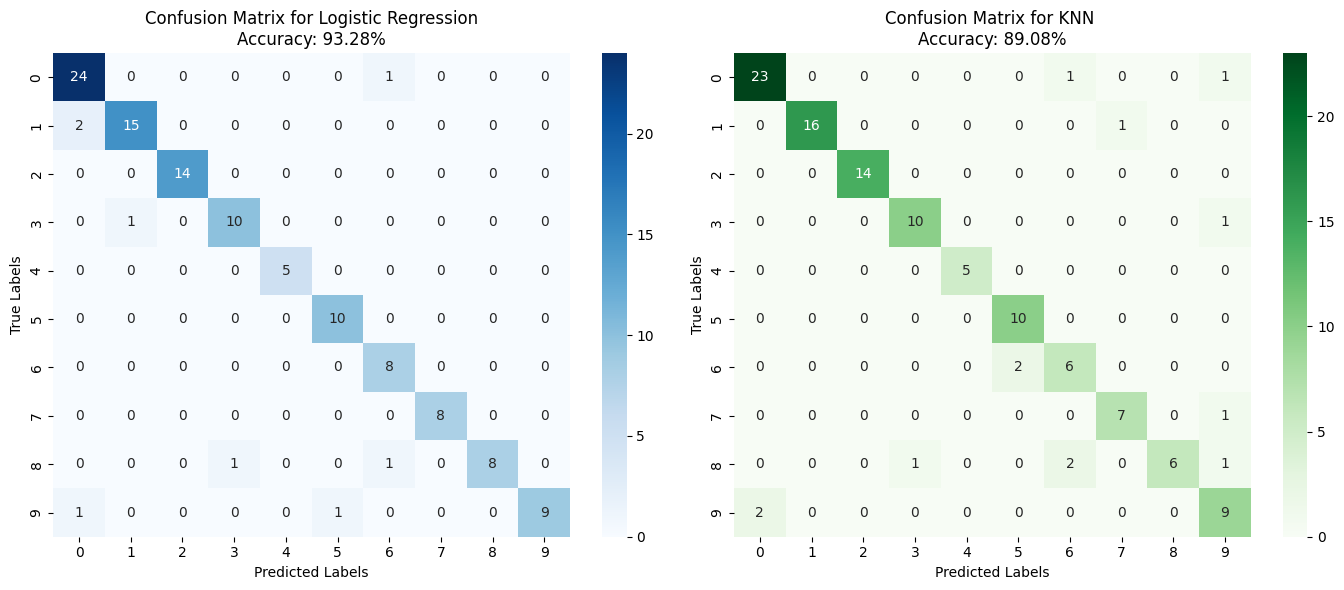

In [19]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', xticklabels=list(set(y_test)), yticklabels=list(set(y_test)), ax=axes[0])
axes[0].set_title(f'Confusion Matrix for Logistic Regression\nAccuracy: {acc_LR * 100:.2f}%')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(cm_Knn, annot=True, fmt='d', cmap='Greens', xticklabels=list(set(y_test)), yticklabels=list(set(y_test)), ax=axes[1])
axes[1].set_title(f'Confusion Matrix for KNN \nAccuracy: {acc_Knn * 100:.2f}%')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
plt.tight_layout()
plt.show()


In [20]:
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'MSE'],
    'Logistic Regression': [acc_LR * 100, precision_LR, recall_LR, mse_LR],
    'KNN': [acc_Knn * 100, precision_Knn, recall_Knn, mse_Knn]
})

print("\nModel Comparison:")
print(metrics)


Model Comparison:
      Metric  Logistic Regression        KNN
0   Accuracy            93.277311  89.075630
1  Precision             0.938241   0.901530
2     Recall             0.932773   0.890756
3        MSE             1.411765   3.285714
